<a href="https://colab.research.google.com/github/SeoJiWon1/ML-DL/blob/main/%ED%98%BC%EC%9E%90_%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D(%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B3%BC_%EB%AA%A8%EB%8D%B8_%EA%B7%9C%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 회귀 알고리즘과 모델 규제

# k-최근접 이웃 회귀

## 회귀 문제
* 두 변수 사이의 상관관계를 분석하는 방법
* 예시) 임의의 어떤 숫자를 예측하는 문제
* 농어의 무게를 예측

## k-최근접 이웃 분류 알고리즘
* 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
* 샘플들의 클래스를 확인하여 다수 클래스를 샐운 샘플의 클래스로 예측

## 데이터 준비

In [ ]:
import numpy as np

# 농어의 길이 -> 특성
# 농어의 무게 -> 타깃



perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

<function matplotlib.pyplot.show(*args, **kw)>

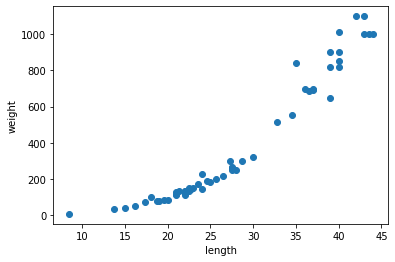

In [ ]:
 # 산점도 그려보기 

import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show

## 훈련세트 / 테스트 세트 분류

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state = 42
)

In [ ]:
# 사이킷 런에 사용할 훈련 세트는 2차원 배열이여야 한다. 
# (4,) 배열을 (2,2) 크기로 바꾸기  --> 1차원 배열을 2차원 배열로 바꿈 
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [ ]:
test_array = test_array.reshape(2,2)
print(test_array.shape)

(2, 2)


In [ ]:
train_input.shape

(42,)

In [ ]:
train_input = train_input.reshape(42,1)

In [ ]:
print(train_input.shape)

(42, 1)


In [ ]:
# -1 기능 사용
train_input_two = train_input.reshape(-1,2)


In [ ]:
print(train_input_two.shape)

(21, 2)


In [ ]:
test_input = test_input.reshape(-1,1)

In [ ]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정계수(R^2)

### KNeighborsRegressor
* 사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스
* 객체 생성
* fit() 메서드로 회귀 모델을 훈련


In [ ]:
from sklearn.neighbors import KNeighborsRegressor # Regressor는 회귀모델 Classifier는 분류모델

knr = KNeighborsRegressor()

# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
# 테스트 세트의 점수를 확인
print(knr.score(test_input, test_target))

0.992809406101064


### 결정계수와 정확도 구분
* 분류의 경우 정확도라 불리며 샘플을 정확하게 분류한 개수의 비율
* 회귀에서는 정확한 숫자를 맞힌다는 것은 거의 불가능
* 그렇기 때문에 다른 값으로 평가하는데 이 점수를 결정계수(coefficient of determination)라고 부른다. 이것이 R^2
* 즉 회귀문제는 R^2이 정확도를 대신하고 분류문제는 정확도를 측정!!!!!!!
* 만약 타깃의 평균 정도를 예측하는 수준이라면 0에 가까워지고, 예측이 타깃에 아주 가까워지면 1에 가까운 값이 된다. 1에 가까울 수록 굿
* R^2 = 1 - { (타깃 - 예측)^2 의 합/ (타깃 - 평균)^2의 합 }

### score() 메서드의 출력값의 의미
* 높을수록 좋다. 
* 대표적으로 정확도나 결정계수

In [ ]:
# 타깃과 예측의 절댓값 오차를 평균하여 반환 mean_absolute_error
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다. 
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

# 결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다. 

19.157142857142862


## 과대적합 vs 과소적합

### 과대적합과 과소적합
* 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델히 훈련 세트에 과대적합(overfitting)되었다고 한다.
* 반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우는 훈련 세트에 과소적합(underfitting) 되었다고 말한다.

In [ ]:
# 앞에서 훈련한 모델을 사용해 훈련 세트의 R^2 점수를 확인
print(knr.score(train_input, train_target)) 
# 훈련세트의 점수가 더 작으니 과소적합 
# 모델을 조금 더 복잡하게 만들면 해결 가능 -> 이웃의 개수 k를 줄이는 것 (기본 k값 5)

0.9698823289099254


### n_neighbors 속성값 바꾸기


In [ ]:
# 이웃의 개수를 3으로 설정
knr.n_neighbors = 3 

# 모델을 다시 훈련
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

# k의 값을 줄였더니 훈련 세트의 R^2 점수가 높아졌다. 

0.9804899950518966


In [ ]:
# 테스트 점수 확인
print(knr.score(test_input, test_target))

# 과소적합 문제 해결 

0.9746459963987609


# 선형 회귀

In [ ]:
import numpy as np

# 농어의 길이 -> 특성
# 농어의 무게 -> 타깃



perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 나눈다. 특성 데이터는 2차원 배열로 변환
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state =42)

# 훈련 세트와 테스트 세트를 2차원 배열로 바꾸기 
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [ ]:
# 최근접 이웃 개수를 3으로 하는 모델을 훈련

from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors =3)

# k - 최근접 이웃 회귀 모델을 훈련합니다. 
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
# 길이가 50cm인 농어의 무게를 예측
print(knr.predict([[50]]))

# 무게가 1,033g으로 예측

[1033.33333333]


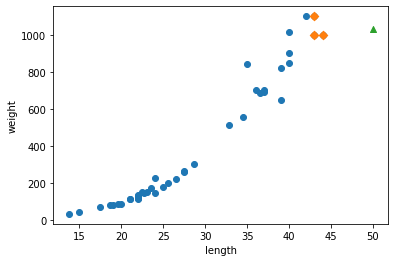

In [ ]:
# 농어의 최근접 이웃을 산점도에 표시
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다. 
distances, indexes = knr.kneighbors(([[50]]))

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker = 'D')

# 50cm 농어 데이터 
plt.scatter(50, 1033, marker ='^')
plt.xlabel("length")
plt.ylabel('weight')
plt.show()

In [ ]:
# 근방 농어들 평균 
print(np.mean(train_target[indexes]))

1033.3333333333333


In [ ]:
print(knr.predict(([[100]])))

[1033.33333333]


## 선형회귀 특성
* 특성이 하나인 경우 어떤 직선을 학습하는 알고리즘
* sklearn.linear_model 패키지 아래에 LinearRegression 클래스 

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 선형 회귀 모델을 훈련합니다. 
lr.fit(train_input, train_target)

# 50cm 농어에 대해 예측합니다. 
print(lr.predict([[50]]))

[1241.83860323]


In [ ]:
# a : 기울기, b : y절편  --> coef_, intercept_
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


### 모델 파라미터
* coef_ , intercept_  그래프의 기울기와 y절편
* 최적의 모델 파라미터를 찾는 것과 같다 >> 모델 기반 학습
* k-최근접 이웃에는 모델 파라미터가 없고 사례 기반 학습이라 한다.

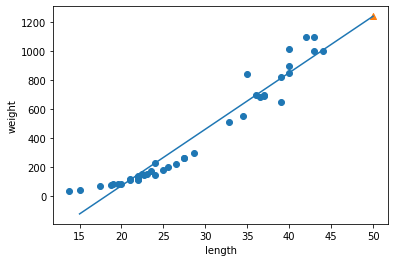

In [ ]:
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다. 
plt.plot([15, 50], [15*lr.coef_ + lr.intercept_, 50*lr.coef_ +lr.intercept_ ])

# 50cm 농어 데이터
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


## 다항회귀
* 여러 개의 특성을 사용한 선형 회귀
* 선형회귀에서는 직선으로 0 밑으로의 값이 생기기 때문에 오류가 발생

### 2차 방정식
* y = a * x^2 + b * x + c 
* 다항식 (polynomial)이라 부르며 다항식을 사용한 선형 회귀를 다항 회귀(poly regression)라 부른다. 

In [ ]:
# column_stack() 함수를 사용하여 제곱 표현 가능 
train_poly = np.column_stack((train_input **2, train_input))
test_poly = np.column_stack((test_input **2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [ ]:
# 2차 방정식 그래프를 찾기 위해 훈련 세트에 제곱 항을 추가했지만, 타깃값은 그대로 사용한다는 것
# 목표하는 값은 어떤 그래프를 훈련하든지 바꿀 필요가 없다.
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]])) 

# fit, predict --> 모델링
# score --> 평가

[1573.98423528]


In [ ]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


In [ ]:
# 최종결과 
# 무게 = 1.01 x 길이**2 - 21.6 x 길이 + 116.05

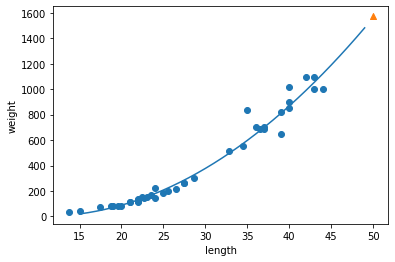

In [ ]:
# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만든다.
point =np.arange(15,50)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 49까지 2차 방정식 그래프를 그립니다. 
plt.plot(point, 1.01 * point**2 - 21.6 * point + 116.05)

# 50cm 농어 데이터
plt.scatter(50, 1574, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 특성 공학과 규제

In [ ]:
# https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rickiepark/hg-mldl/master/perch_full.csv")
df

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94
5,18.0,5.22,3.32
6,18.7,5.20,3.12
7,19.0,5.64,3.05
8,19.6,5.14,3.04
9,20.0,5.08,2.77


In [ ]:
perch_full = df.to_numpy() # to_numpy() 넘파이 배열로 바꾸는 메소드 
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [ ]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
# perch_full과 perch_weight를 훈련 세트와 테스트 세트로 나눕니다. 
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state =42)

## 사이킷런의 변환기 (transformer)
* 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공
* 이러한 클래스를 변환기라고 부른다 
* 사이킷런의 모델 클래스에 일괄된 fit(), score(), predict()처럼 변환기 클래스는 fit(), transform() 메서드를 제공한다.
* LinearRegression 같은 사이킷런의 모델 클래스는 추정기(estimatoer)라고 부른다. 

In [ ]:
# PolynomialFetures 클래스 사용 
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


### PolynomialFeatures 
* 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다. 

In [ ]:
poly = PolynomialFeatures(include_bias =False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [ ]:
poly = PolynomialFeatures(include_bias =False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [ ]:
# 9개의 특성이 어떻게 만들어졌는지 확인
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [ ]:
test_poly = poly.transform(test_input)

### 다중회귀 모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594134


## 규제 (regularization)
* 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 훼방하는 것을 말한다. 
* 즉 모델이 훈련 세트에 과대적합되지 않도록 만드는 것
* 선형 회귀 모델의 경우 기울기의 크기를 작게 만드는 일  


### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지와 라쏘
* 선형 회귀 모델에 규제를 추가한 모델을 릿지와 라쏘라고 부른다.
* 릿지는 계수를 제곱한 값을 기준으로 규제 적용
* 라쏘는 계수의 절댓값을 기준으로 규제를 적용

### 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9857915060511934


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9835057194929057


## 하이퍼파라미터
* 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터를 하이퍼파라미터라고 부른다.
* 클래스와 메서드의 매개변수로 표현됨
* 함수와 클래스의 파라미터는 매개변수